In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from tqdm.notebook import tqdm
import scipy.stats as stats


from models.game import *

sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context("paper")
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams['xtick.direction'] = 'out'


In [2]:
sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context('paper')
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.labelsize']  =15
plt.rcParams['xtick.labelsize']  =15
plt.rcParams['legend.fontsize']  = 16
plt.rcParams['axes.labelsize' ] = 16
plt.rcParams['font.size'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.markersize'] = 15


In [3]:
def process(list_strategy_profile, game : Game) : 
    data_utilities = []
    data_temp = []
    list_sum_strategy = np.sum(list_strategy_profile, axis=1)
    list_ = list(zip(list_strategy_profile,list_sum_strategy))
    for strategy, sum_ in tqdm(list_, total = len(list_), desc ='Processing'):
        u,temp = game.game_with_strategies_profile(strategy,sum_)
        data_utilities.append(u)
        data_temp.append(temp)
    return np.array(data_utilities), np.array(data_temp)

In [4]:
FIRST_YEAR = 2020
"Year of the first occurence of the game."

FINAL_YEAR = 2100
"Year of the last occurence of the game."

STEP = 5
"Number of years between two occurence of the game."

T = int((FINAL_YEAR - FIRST_YEAR) / STEP) 

horizon = FINAL_YEAR

r = [1.15, 1.60, 2, 0.5, 1.25,0.75]
e = [2, -2, -5, -4, -5, 2.5]

# Two player

In [23]:
N = 2
"Default number of players"

# Espaces d'action des joueurs en GtCO2


ACTION_SETS =  np.array([[[0.0, 11.47],        # China  
                         [0.0, 5.01]]]*2*T)*4       # other 

ACTION_SETS = np.swapaxes(ACTION_SETS,0,1)


r"""Default action set of the players.

References
----------

.. [1] Hannah Ritchie, Max Roser and Pablo Rosado (2020) - "CO₂ and Greenhouse Gas Emissions". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions' [Online Resource]
       https://ourworldindata.org/grapher/annual-co2-emissions-per-country?facet=none&country=CHN~USA~European+Union+%2828%29~IND~RUS~Asia+%28excl.+China+and+India%29

"""

# ACTION_SETS =  np.array([[[0.0, 10.0],        # China  
#                          [0.0, 0.1],         # USA
#                          [0.0, 0.1],         # EU
#                          [0.0, 0.1],         # India
#                          [0.0, 0.1],         # Russia
#                          [0.0, 0.1]]]*T)  
# Coefficient d'impact de la temperature sur le climat 

DELTAS = np.array([1.1847,
                    1.1941])
r"""Default damage multiplier. 

References
----------

.. [1] http://www.fund-model.org/MimiFUND.jl/latest/tables/#Table-RT:-Regional-temperature-conversion-factor-1
"""



# PIB max des joueurs, j'ai pris le PIB 2020                

GDP_MAX = np.array([14.63,
                    19.29])*10


NAMES = ['China', 'USA']


r = [ 0.2, 0.4]
e = [10,-2]

lower_bounds = np.copy(ACTION_SETS[:,:T,:][..., 0])
upper_bounds = np.copy(ACTION_SETS[:,:T,:][..., 1])

In [24]:
from utility.array_to_latex import array_to_latex

X = 2020 + np.arange((horizon-2020)//5 )*5

list_t_piece = np.arange(1,T,2)


list_damage_coef = [np.array([0,0,1]), np.array([0,-2,2]), np.array([0,0.25,0.16])] #, np.array([0,0,2]) ] #np.array([0,-2,2]),  np.array([0,-0.5,1.1])] #, np.array([0,0,1.1450]), np.array([0,0,0,0,1])]
list_alpha = [1,1.5,2] #[1,1.5,2]
list_list_benefit_functions = [
                                [partial(benefit_sigm, e=e[i], r = r[i]) for i in range(N)],
                                # BENEFITS_CONCAVE,
                                ]
 #[partial(benefit_sigm, e=e[i], r = r[i]) for i in range(N)], BENEFITS_LOG]
list_label_benefit_function = [
                                ('Sigmoid', '-'),
                                # ('Concave', '--'),
                                ]
#, #, ('Logaritmic', 'dotted')]
# list_damage_label = [array_to_latex(coef) for coef in list_damage_coef]


list_damage_label = [array_to_latex(coef) for coef in list_damage_coef]

case = 'sigmoid'
list_param = list(product(list_damage_coef, list_alpha, list_list_benefit_functions))
list_label = list(product(list_damage_label, list_alpha, list_label_benefit_function))

In [25]:
alpha = list_alpha[1]
benef = list_list_benefit_functions[0]
coef = list_damage_coef[1]

list_players = create_players(alpha=alpha, list_action_sets=ACTION_SETS, list_of_names=NAMES, list_benefit_functions=benef, damage_function=damage_polynome(coef), discount=1)

game = Game(list_players, horizon=horizon)

In [26]:
a_, sum_a_, u_, sum_u_, temp_ = game.receding_BRD_by_piece_return(1)
a_so, sum_a_so, u_so, sum_u_so, temp_so = game.planning_SO_by_piece_return(1)

a_rece, sum_a_rece, u_rece, sum_u_rece, temp_rece = game.receding_BRD_by_piece_return(T)
a_plan, sum_a_plan, u_plan, sum_u_plan, temp_plan = game.planning_BRD_by_piece_return(T)

a_plan_so, sum_a_plan_so, u_plan_so, sum_u_plan_so, temp_plan_so = game.planning_SO_by_piece_return(T)
a_rece_so, sum_a_rece_so, u_rece_so, sum_u_rece_so, temp_rece_so = game.receding_SO_by_piece_return(T)

list_a = [a_, a_so, a_plan, a_plan_so, a_rece, a_rece_so]

u__ = np.sum(u_, axis=1)
u_so_ = np.sum(u_so, axis =1)
u_p = np.sum(u_plan, axis=1)
u_r = np.sum(u_rece, axis=1)
u_p_so = np.sum(u_plan_so, axis =1)
u_r_so = np.sum(u_rece_so, axis =1)

list_u =  [u__, u_so_, u_p, u_p_so, u_r, u_r_so]
list_temp = [temp_, temp_so, temp_plan, temp_plan_so, temp_rece, temp_rece_so]


Receding SO, t_piece = 16: 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]


In [9]:
def generate_perturbation(action, lower_bounds, upper_bounds, size=1000, scale=.05):
    shape = action.shape
    perturbation = stats.norm.rvs(loc = 0, scale=scale, size=(size,*shape))
    arr = action + perturbation
    res = np.where(arr < upper_bounds, arr, upper_bounds)
    res = np.where(res > lower_bounds, res, lower_bounds)
    return res

In [10]:
x = np.concatenate([np.concatenate([generate_perturbation(action, lower_bounds, upper_bounds, scale=scale) for scale in [0.05, 0.15, 0.5, 1, 1.5 ,2]]) for action in list_a]) 

In [11]:
p = np.where(x < upper_bounds, x, upper_bounds)
p = np.where(p > lower_bounds, p, lower_bounds)
for l in x :
    if (upper_bounds < l).any() :
        print( upper_bounds - l ) 


In [12]:
data_u, data_t = process(x, game)


Processing:   1%|          | 225/36000 [00:00<00:15, 2249.99it/s]

Processing: 100%|██████████| 36000/36000 [00:18<00:00, 1949.67it/s]


In [13]:
value_constraints = np.zeros((2,2))

arr_u = np.stack(list_u)
print(arr_u)
value_constraints[0,0] = np.min(arr_u[:,0])
value_constraints[1,0] = np.max(arr_u[:,0])
value_constraints[0,1] = np.max(arr_u[:,1])
value_constraints[1,1] = np.min(arr_u[:,1])
print(value_constraints)

[[1709.82518496 2247.84368012]
 [1879.0331084  2485.12237626]
 [2000.00396442 2671.01910807]
 [1988.08404714 2722.66260821]
 [1997.93332182 2682.55155838]
 [1875.27257383 2715.14791097]]
[[1709.82518496 2722.66260821]
 [2000.00396442 2247.84368012]]


In [14]:
actions, utilities, temp = game.pareto_front(value_constraints=value_constraints, nb_points=20)

Player 1: 100%|██████████| 20/20 [00:33<00:00,  1.65s/it]


In [15]:
# temp_solution_concept = [t_[T-1]*1.2 for t_ in list_temp]


In [27]:
info = '_2player'

C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_22448\434474881.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(p, extend='both')


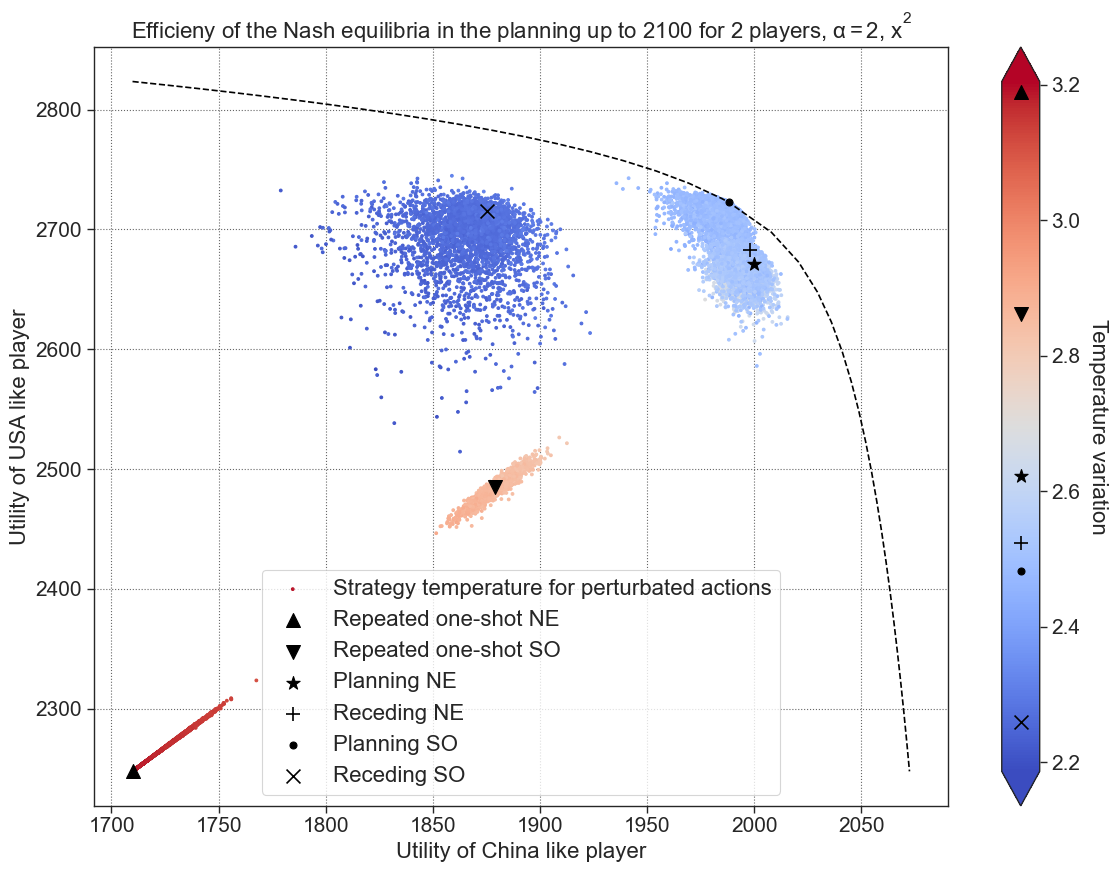

In [31]:
fig = plt.figure(dpi = 100, figsize=(12,9))
ax = fig.gca()
p = ax.scatter(data_u[:,0], data_u[:,1], c=data_t[:,T-1], cmap='coolwarm', marker='.', s=15, label='Strategy temperature for perturbated actions')
# ax[0] =  sns.kdeplot(x=data_u[:,0], y=data_u[:,1], hue=data_t[:,T-1], warn_singular=False)
all_temp = np.concatenate([data_t[:,T-1],np.array([temp_[T-1]*1.005])], axis = 0)
min_, max_ = all_temp.min(), all_temp.max()
p.set_clim(min_, max_)

ax.plot(utilities[:,0], utilities[:,1], color= 'black', ls='--')
cbar = fig.colorbar(p, extend='both')



p =  ax.scatter(u__[0], u__[1], marker='^', c='black', s=100, label='Repeated one-shot NE')
ax.scatter(u_so_[0], u_so_[1], marker='v', c='black', s=100, label='Repeated one-shot SO')
p.set_clim(min_, max_)
ax.scatter(u_p[0], u_p[1], marker='*', c='black', s=100, label='Planning NE')
ax.scatter(u_r[0], u_r[1], marker='+', c='black',s=100, label='Receding NE')

ax.scatter(u_p_so[0], u_p_so[1], marker='.',c='black', s=100, label='Planning SO')
ax.scatter(u_r_so[0], u_r_so[1], marker='x',c='black', s=100, label='Receding SO')

x_s = cbar.ax.set_xlim()
x_s = sum(x_s)/2
ax.legend()
cbar.ax.scatter(x_s,temp_[T-1], marker='^',c='black', s=100, label='Repeated one-shot NE')
cbar.ax.scatter(x_s,temp_so[T-1], marker='v',c='black', s=100, label='Repeated one-shot SO')

cbar.set_label('Temperature variation', rotation=270, labelpad=20)
cbar.ax.scatter(x_s,temp_plan[T-1], marker='*', c='black', s=100, label='Nash Equilibria')
cbar.ax.scatter(x_s,temp_rece[T-1], marker='+', c='black',s=100, label='Receding Nash Equilibria')
cbar.ax.scatter(x_s,temp_plan_so[T-1], marker='.',c='black', s=100, label='SO')
cbar.ax.scatter(x_s,temp_rece_so[T-1], marker='x',c='black', s=100, label='Receding SO')

plt.xlabel('Utility of China like player')
plt.ylabel('Utility of USA like player')
plt.title('Efficieny of the Nash equilibria in the planning up to {} for {} players, $\\alpha = 2$, $x^2$'.format(horizon, N))
plt.savefig('journal/Efficiency' + info + '.pdf', format='pdf')
plt.show()

In [18]:
ne_style = {
    'color' : 'black',
    'linewidths' : 1,
            }
so_style = {
    'c' : 'white',
    'edgecolors' : 'black',
    'linewidths' : 1,
    'alpha' : 1
            }

C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_22448\521103228.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(p, extend='both')


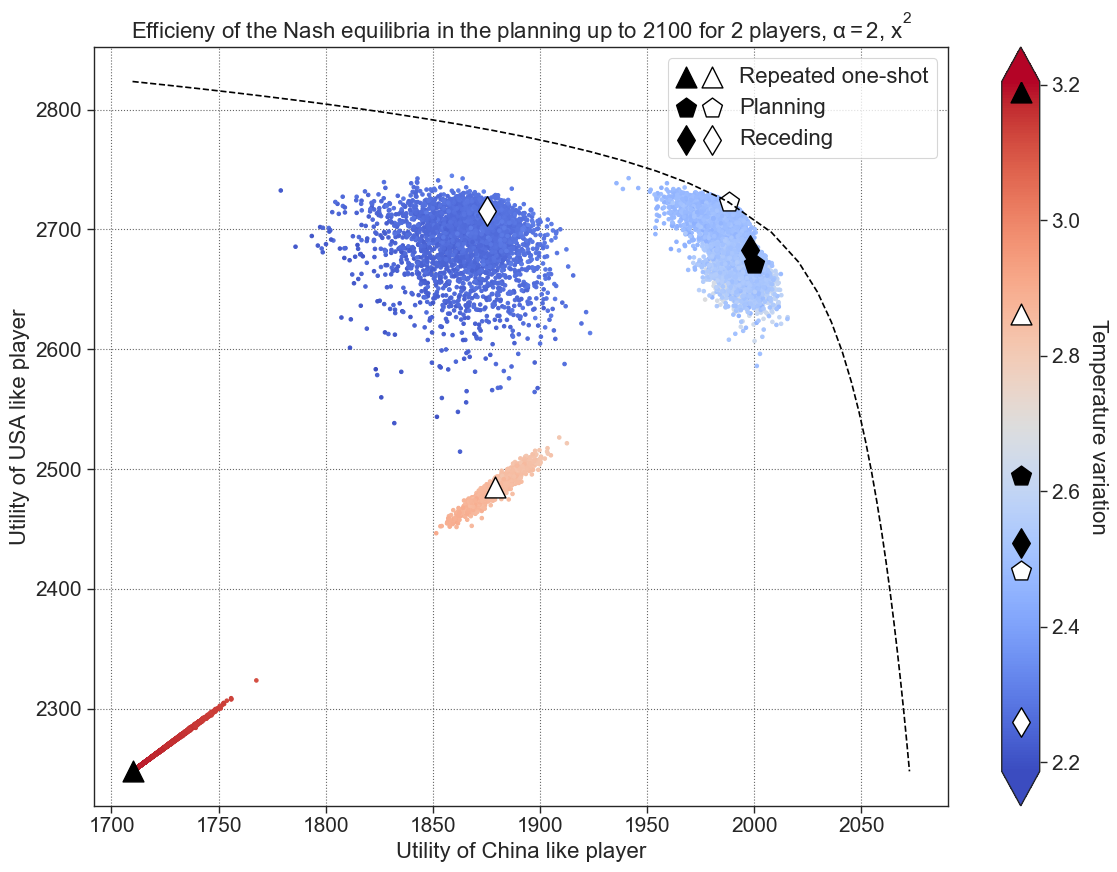

In [34]:
from matplotlib.legend_handler import HandlerTuple

fig = plt.figure(dpi = 100, figsize=(12,9))
ax = fig.gca()
p = ax.scatter(data_u[:,0], data_u[:,1], c=data_t[:,T-1], cmap='coolwarm', marker='.', s=25, rasterized=True) #, label='Strategy temperature for perturbated actions')
all_temp = np.concatenate([data_t[:,T-1],np.array([temp_[T-1]*1.005])], axis = 0)
min_, max_ = all_temp.min(), all_temp.max()
p.set_clim(min_, max_)

ax.plot(utilities[:,0], utilities[:,1], color= 'black', ls='--')

p1 = ax.scatter(u__[0], u__[1], marker='^', **ne_style, label='Repeated one-shot')
p2 = ax.scatter(u_so_[0], u_so_[1], marker='^', **so_style)
repeated = (p1, p2)

p1 = ax.scatter(u_p[0], u_p[1], marker='p', **ne_style, label='Planning')
p2 = ax.scatter(u_p_so[0], u_p_so[1], marker='p', **so_style)
planning = (p1,p2)

p1 = ax.scatter(u_r[0], u_r[1], marker='d',**ne_style, label='Receding')
p2 = ax.scatter(u_r_so[0], u_r_so[1], marker='d', **so_style)
receding = (p1,p2)

handles, labels = ax.get_legend_handles_labels()

handles = [repeated, planning, receding]

cbar = fig.colorbar(p, extend='both')

ax.legend(handles = handles, labels = labels, handler_map={tuple: HandlerTuple(ndivide=None)})

# ax.scatter(u__[0], u__[1], marker='^', c='black', s=100, label='Repeated one-shot NE')
# ax.scatter(u_so_[0], u_so_[1], marker='v', c='black', s=100, label='Repeated one-shot SO')

# ax.scatter(u_p[0], u_p[1], marker='*', c='black', s=100, label='Planning NE')
# ax.scatter(u_r[0], u_r[1], marker='+', c='black',s=100, label='Receding NE')
# ax.scatter(u_p_so[0], u_p_so[1], marker='.',c='black', s=100, label='Planning SO')
# ax.scatter(u_r_so[0], u_r_so[1], marker='x',c='black', s=100, label='Receding SO')
x_s = cbar.ax.set_xlim()
x_s = sum(x_s)/2
cbar.ax.scatter(x_s,temp_[T-1], marker='^', **ne_style)
cbar.ax.scatter(x_s,temp_so[T-1], marker='^', **so_style)

cbar.set_label('Temperature variation', rotation=270, labelpad=20)
cbar.ax.scatter(x_s,temp_plan[T-1], marker='p', **ne_style)
cbar.ax.scatter(x_s,temp_plan_so[T-1], marker='p', **so_style)

cbar.ax.scatter(x_s,temp_rece[T-1], marker='d', **ne_style)
cbar.ax.scatter(x_s,temp_rece_so[T-1], marker='d', **so_style)

plt.xlabel('Utility of China like player')
plt.ylabel('Utility of USA like player')
plt.title('Efficieny of the Nash equilibria in the planning up to {} for {} players, $\\alpha = 2$, $x^2$'.format(horizon, N))
plt.savefig('journal/Efficiency' + info + '.pdf', format='pdf')
plt.show()

C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_47004\290674607.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_47004\290674607.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(p, ax=ax)


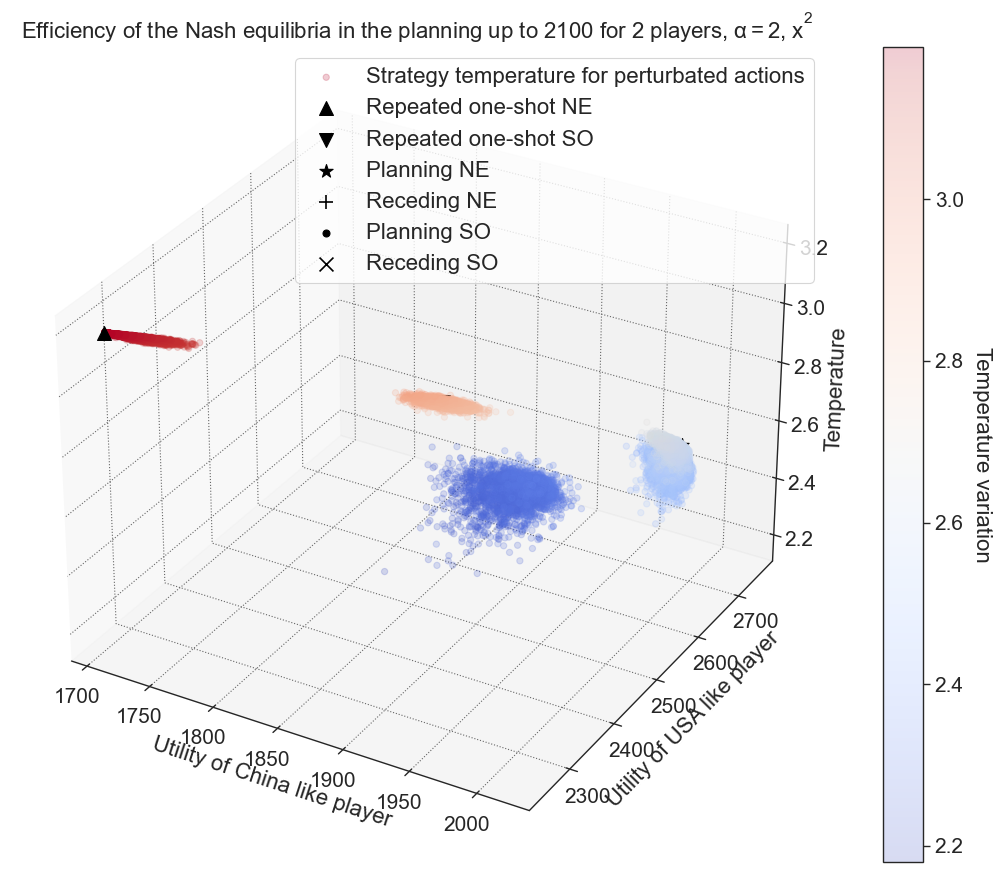

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=100, figsize=(12, 9))
ax = fig.gca(projection='3d')

p = ax.scatter(data_u[:, 0], data_u[:, 1], data_t[:, T-1], c=data_t[:, T-1], cmap='coolwarm', alpha = 0.2,
               label='Strategy temperature for perturbated actions')

# ax.plot(utilities[:, 0], utilities[:, 1], data_t[:, T-1], color='black', ls='--')

ax.scatter(u__[0], u__[1], temp_[T-1], marker='^', c='black', s=100, label='Repeated one-shot NE')
ax.scatter(u_so_[0], u_so_[1], temp_so[T-1], marker='v', c='black', s=100, label='Repeated one-shot SO')

ax.scatter(u_p[0], u_p[1], temp_plan[T-1], marker='*', c='black', s=100, label='Planning NE')
ax.scatter(u_r[0], u_r[1], temp_rece[T-1], marker='+', c='black', s=100, label='Receding NE')
ax.scatter(u_p_so[0], u_p_so[1], temp_plan_so[T-1], marker='.', c='black', s=100, label='Planning SO')
ax.scatter(u_r_so[0], u_r_so[1], temp_rece_so[T-1], marker='x', c='black', s=100, label='Receding SO')

ax.legend()

cbar = fig.colorbar(p, ax=ax)
cbar.set_label('Temperature variation', rotation=270, labelpad=20)

ax.set_xlabel('Utility of China like player')
ax.set_ylabel('Utility of USA like player')
ax.set_zlabel('Temperature')

plt.title('Efficiency of the Nash equilibria in the planning up to {} for {} players, $\\alpha = 2$, $x^2$'.format(horizon, N))

plt.savefig('journal/Efficiency.pdf', format='pdf')
plt.show()


C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_47004\3541999328.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_47004\3541999328.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(p, ax=ax)


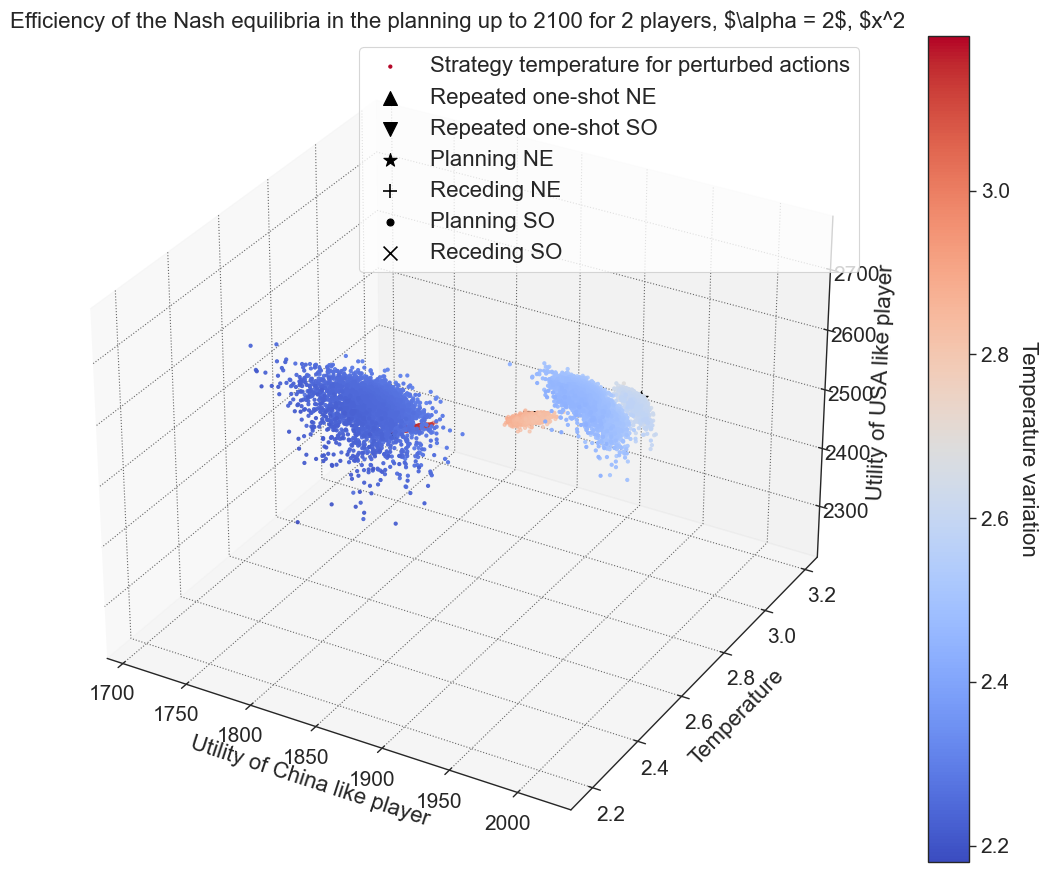

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=100, figsize=(12, 9))
ax = fig.gca(projection='3d')

p = ax.scatter(data_u[:, 0], data_t[:, T-1], data_u[:, 1], c=data_t[:, T-1], cmap='coolwarm', marker='.',
               label='Strategy temperature for perturbed actions')

# ax.plot(utilities[:, 0], temp_[T-1], utilities[:, 1], color='black', ls='--')

ax.scatter(u__[0], temp_[T-1], u__[1], marker='^', c='black', s=100, label='Repeated one-shot NE')
ax.scatter(u_so_[0], temp_so[T-1], u_so_[1], marker='v', c='black', s=100, label='Repeated one-shot SO')

ax.scatter(u_p[0], temp_plan[T-1], u_p[1], marker='*', c='black', s=100, label='Planning NE')
ax.scatter(u_r[0], temp_rece[T-1], u_r[1], marker='+', c='black', s=100, label='Receding NE')
ax.scatter(u_p_so[0], temp_plan_so[T-1], u_p_so[1], marker='.', c='black', s=100, label='Planning SO')
ax.scatter(u_r_so[0], temp_rece_so[T-1], u_r_so[1], marker='x', c='black', s=100, label='Receding SO')

ax.legend()

cbar = fig.colorbar(p, ax=ax)
cbar.set_label('Temperature variation', rotation=270, labelpad=20)

ax.set_xlabel('Utility of China like player')
ax.set_ylabel('Temperature')
ax.set_zlabel('Utility of USA like player')

plt.title('Efficiency of the Nash equilibria in the planning up to {} for {} players, $\\alpha = 2$, $x^2'.format(horizon, N))

plt.savefig('journal/Efficiency.pdf', format='pdf')
plt.show()


C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_47004\2660784082.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_47004\2660784082.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(p, ax=ax)


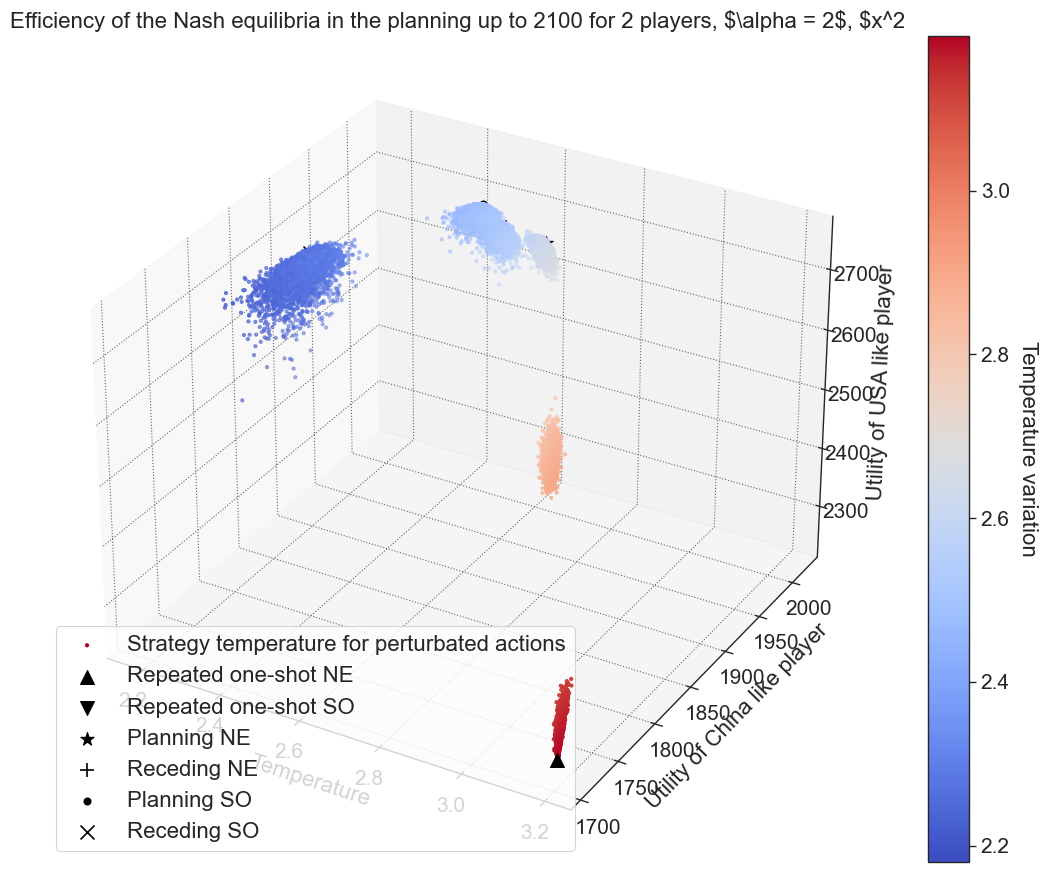

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=100, figsize=(12, 9))
ax = fig.gca(projection='3d')

p = ax.scatter(data_t[:, T-1], data_u[:, 0], data_u[:, 1], c=data_t[:, T-1], cmap='coolwarm', marker='.',
               label='Strategy temperature for perturbated actions')

# ax.plot(data_t[:, T-1], utilities[:, 0], utilities[:, 1], color='black', ls='--')

ax.scatter(temp_[T-1], u__[0], u__[1], marker='^', c='black', s=100, label='Repeated one-shot NE')
ax.scatter(temp_so[T-1], u_so_[0], u_so_[1], marker='v', c='black', s=100, label='Repeated one-shot SO')

ax.scatter(temp_plan[T-1], u_p[0], u_p[1], marker='*', c='black', s=100, label='Planning NE')
ax.scatter(temp_rece[T-1], u_r[0], u_r[1], marker='+', c='black', s=100, label='Receding NE')
ax.scatter(temp_plan_so[T-1], u_p_so[0], u_p_so[1], marker='.', c='black', s=100, label='Planning SO')
ax.scatter(temp_rece_so[T-1], u_r_so[0], u_r_so[1], marker='x', c='black', s=100, label='Receding SO')

ax.legend()

cbar = fig.colorbar(p, ax=ax)
cbar.set_label('Temperature variation', rotation=270, labelpad=20)

ax.set_xlabel('Temperature')
ax.set_ylabel('Utility of China like player')
ax.set_zlabel('Utility of USA like player')

plt.title('Efficiency of the Nash equilibria in the planning up to {} for {} players, $\\alpha = 2$, $x^2'.format(horizon, N))

plt.savefig('journal/Efficiency.pdf', format='pdf')
plt.show()


In [ ]:
import numpy as np

def generate_samples_close_to_point(point, epsilon, low, up):
    k = len(point)
    sample = np.zeros(k)
    
    for i in range(k):
        lower_bound = max(low, point[i] - epsilon)
        upper_bound = min(up, point[i] + epsilon)
        sample[i] = np.random.uniform(lower_bound, upper_bound)
    
    return sample


array([2.32192265, 2.32756532, 2.33338965, 2.33942911, 2.34569072,
       2.35219905, 2.35898574, 2.36609188, 2.37352081, 2.38132886,
       2.38955978, 2.39824364, 2.40751202, 2.41737606, 2.42795469,
       2.43935696, 2.45168339, 2.46496891, 2.47908842, 2.48227366,
       2.48226911, 2.4995516 , 2.50592359, 2.505533  , 2.50206037,
       2.4974461 , 2.4925309 , 2.48767064, 2.48295377, 2.47847228,
       2.47421506, 2.47016693, 2.4663139 , 2.46269659, 2.45917317,
       2.45590878, 2.45278591, 2.44976596, 2.44681595, 2.44408961])

C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_47004\2599792030.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(p)


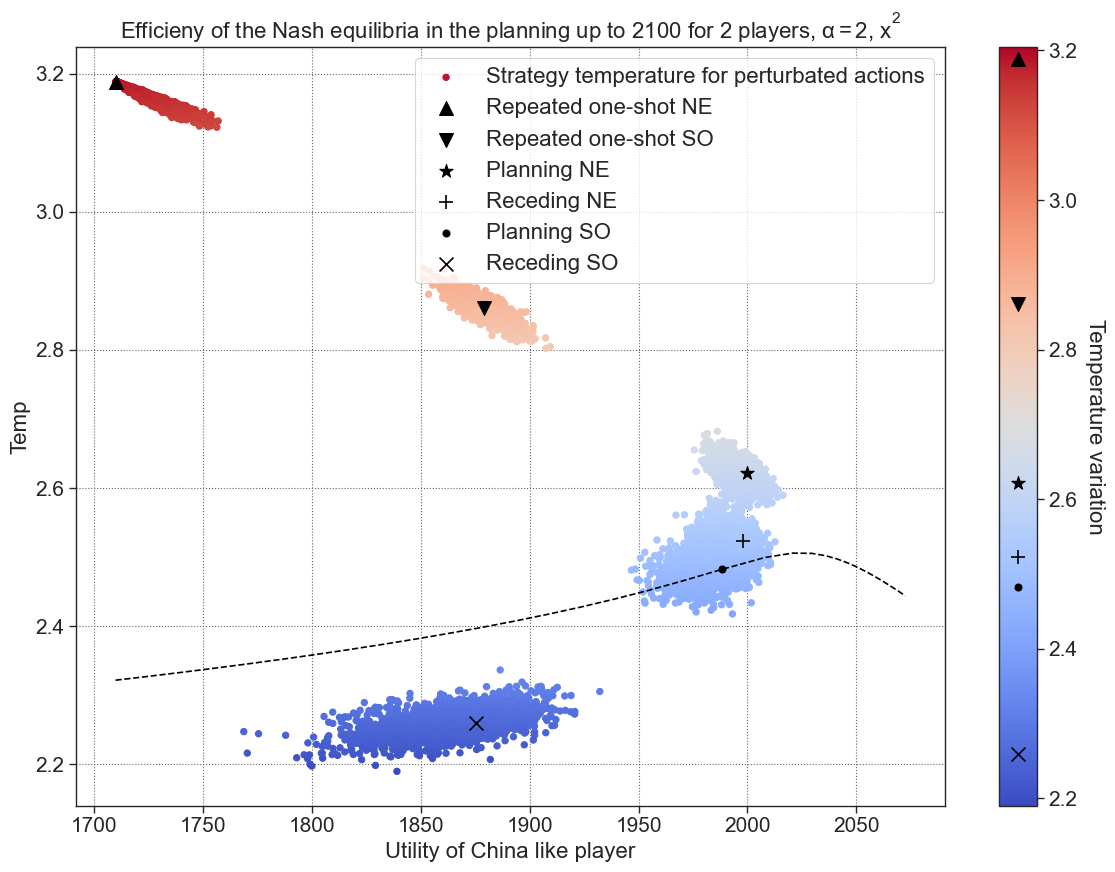

In [209]:
fig = plt.figure(dpi = 100, figsize=(12,9))
ax = fig.gca()
p = ax.scatter(data_u[:,0], data_t[:,T-1], c = data_t[:,T-1], cmap='coolwarm', marker='.', label='Strategy temperature for perturbated actions')
all_temp = np.concatenate([data_t[:,T-1],np.array([temp_[T-1]*1.005])], axis = 0)
min_, max_ = all_temp.min(), all_temp.max()
p.set_clim(min_, max_)

ax.plot(utilities[:,0], temp[:,T-1], color= 'black', ls='--')
cbar = fig.colorbar(p)

ax.scatter(u__[0], temp_[T-1], marker='^', c='black', s=100, label='Repeated one-shot NE')
ax.scatter(u_so_[0], temp_so[T-1], marker='v', c='black', s=100, label='Repeated one-shot SO')

ax.scatter(u_p[0], temp_plan[T-1], marker='*', c='black', s=100, label='Planning NE')
ax.scatter(u_r[0], temp_rece[T-1], marker='+', c='black',s=100, label='Receding NE')
ax.scatter(u_p_so[0], temp_plan_so[T-1], marker='.',c='black', s=100, label='Planning SO')
ax.scatter(u_r_so[0], temp_rece_so[T-1], marker='x',c='black', s=100, label='Receding SO')
x_s = cbar.ax.set_xlim()
x_s = sum(x_s)/2
ax.legend()
cbar.ax.scatter(x_s,temp_[T-1], marker='^',c='black', s=100, label='Repeated one-shot NE')
cbar.ax.scatter(x_s,temp_so[T-1], marker='v',c='black', s=100, label='Repeated one-shot SO')

cbar.set_label('Temperature variation', rotation=270, labelpad=20)
cbar.ax.scatter(x_s,temp_plan[T-1], marker='*', c='black', s=100, label='Nash Equilibria')
cbar.ax.scatter(x_s,temp_rece[T-1], marker='+', c='black',s=100, label='Receding Nash Equilibria')
cbar.ax.scatter(x_s,temp_plan_so[T-1], marker='.',c='black', s=100, label='SO')
cbar.ax.scatter(x_s,temp_rece_so[T-1], marker='x',c='black', s=100, label='Receding SO')

plt.xlabel('Utility of China like player')
plt.ylabel('Temp')
plt.title('Efficieny of the Nash equilibria in the planning up to {} for {} players, $\\alpha = 2$, $x^2$'.format(horizon, N))
plt.savefig('journal/Efficiency' + '.pdf', format='pdf')
plt.show()

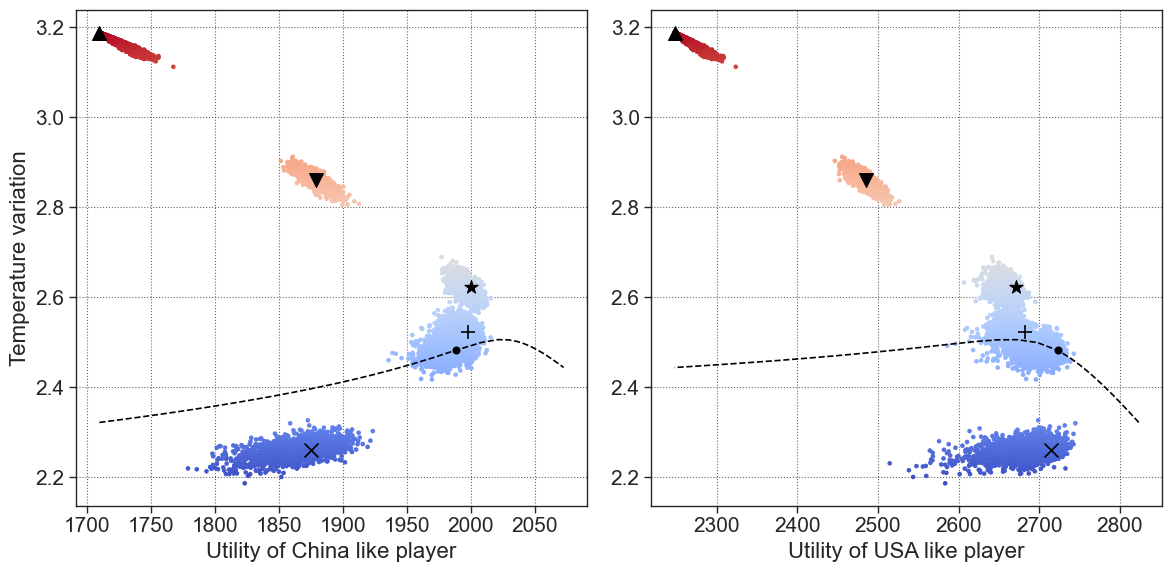

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, dpi=100, figsize=(12, 6))

# Subplot 1
axs[0].scatter(data_u[:, 0], data_t[:, T-1], c=data_t[:, T-1], cmap='coolwarm', marker='.', s= 25 , label='Strategy temperature for perturbated actions', rasterized=True)
axs[0].plot(utilities[:, 0], temp[:, T-1], color='black', ls='--')
axs[0].scatter(u__[0], temp_[T-1], marker='^', c='black', s=100, label='Repeated one-shot NE')
axs[0].scatter(u_so_[0], temp_so[T-1], marker='v', c='black', s=100, label='Repeated one-shot SO')
axs[0].scatter(u_p[0], temp_plan[T-1], marker='*', c='black', s=100, label='Planning NE')
axs[0].scatter(u_r[0], temp_rece[T-1], marker='+', c='black', s=100, label='Receding NE')
axs[0].scatter(u_p_so[0], temp_plan_so[T-1], marker='.', c='black', s=100, label='Planning SO')
axs[0].scatter(u_r_so[0], temp_rece_so[T-1], marker='x', c='black', s=100, label='Receding SO')
axs[0].set_xlabel('Utility of China like player')
axs[0].set_ylabel('Temperature variation')


# Subplot 2
axs[1].scatter(data_u[:, 1], data_t[:, T-1], c=data_t[:, T-1], cmap='coolwarm', marker='.', s= 25, label='Strategy temperature for perturbated actions', rasterized=True)
axs[1].plot(utilities[:, 1], temp[:, T-1], color='black', ls='--')
axs[1].scatter(u__[1], temp_[T-1], marker='^', c='black', s=100, label='Repeated one-shot NE')
axs[1].scatter(u_so_[1], temp_so[T-1], marker='v', c='black', s=100, label='Repeated one-shot SO')
axs[1].scatter(u_p[1], temp_plan[T-1], marker='*', c='black', s=100, label='Planning NE')
axs[1].scatter(u_r[1], temp_rece[T-1], marker='+', c='black', s=100, label='Receding NE')
axs[1].scatter(u_p_so[1], temp_plan_so[T-1], marker='.', c='black', s=100, label='Planning SO')
axs[1].scatter(u_r_so[1], temp_rece_so[T-1], marker='x', c='black', s=100, label='Receding SO')
axs[1].set_xlabel('Utility of USA like player')


plt.tight_layout()
plt.savefig('journal/Efficiency_separated' + info + '.pdf', format='pdf')
plt.show()


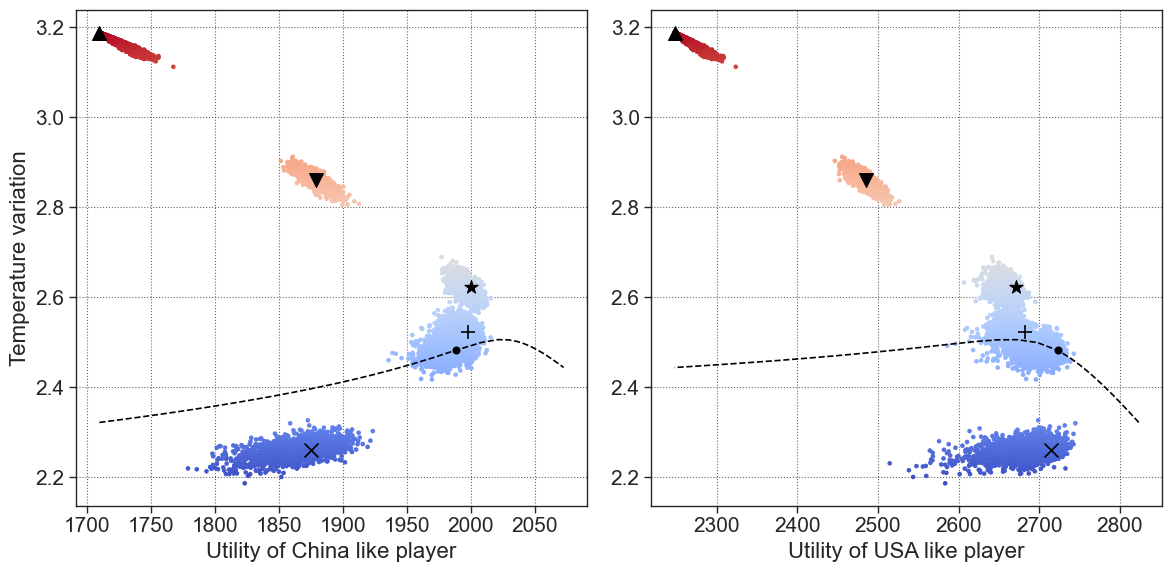

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, dpi=100, figsize=(12, 6))

# Subplot 1
axs[0].scatter(data_u[:, 0], data_t[:, T-1], c=data_t[:, T-1], cmap='coolwarm', marker='.', s= 25 , label='Strategy temperature for perturbated actions', rasterized=True)
axs[0].plot(utilities[:, 0], temp[:, T-1], color='black', ls='--')
axs[0].scatter(u__[0], temp_[T-1], marker='^', c='black', s=100, label='Repeated one-shot NE')
axs[0].scatter(u_so_[0], temp_so[T-1], marker='v', c='black', s=100, label='Repeated one-shot SO')
axs[0].scatter(u_p[0], temp_plan[T-1], marker='*', c='black', s=100, label='Planning NE')
axs[0].scatter(u_r[0], temp_rece[T-1], marker='+', c='black', s=100, label='Receding NE')
axs[0].scatter(u_p_so[0], temp_plan_so[T-1], marker='.', c='black', s=100, label='Planning SO')
axs[0].scatter(u_r_so[0], temp_rece_so[T-1], marker='x', c='black', s=100, label='Receding SO')
axs[0].set_xlabel('Utility of China like player')
axs[0].set_ylabel('Temperature variation')


# Subplot 2
axs[1].scatter(data_u[:, 1], data_t[:, T-1], c=data_t[:, T-1], cmap='coolwarm', marker='.', s= 25, label='Strategy temperature for perturbated actions', rasterized=True)
axs[1].plot(utilities[:, 1], temp[:, T-1], color='black', ls='--')
axs[1].scatter(u__[1], temp_[T-1], marker='^', c='black', s=100, label='Repeated one-shot NE')
axs[1].scatter(u_so_[1], temp_so[T-1], marker='v', c='black', s=100, label='Repeated one-shot SO')
axs[1].scatter(u_p[1], temp_plan[T-1], marker='*', c='black', s=100, label='Planning NE')
axs[1].scatter(u_r[1], temp_rece[T-1], marker='+', c='black', s=100, label='Receding NE')
axs[1].scatter(u_p_so[1], temp_plan_so[T-1], marker='.', c='black', s=100, label='Planning SO')
axs[1].scatter(u_r_so[1], temp_rece_so[T-1], marker='x', c='black', s=100, label='Receding SO')
axs[1].set_xlabel('Utility of USA like player')


plt.tight_layout()
plt.savefig('journal/Efficiency_separated' + info + '.pdf', format='pdf')
plt.show()


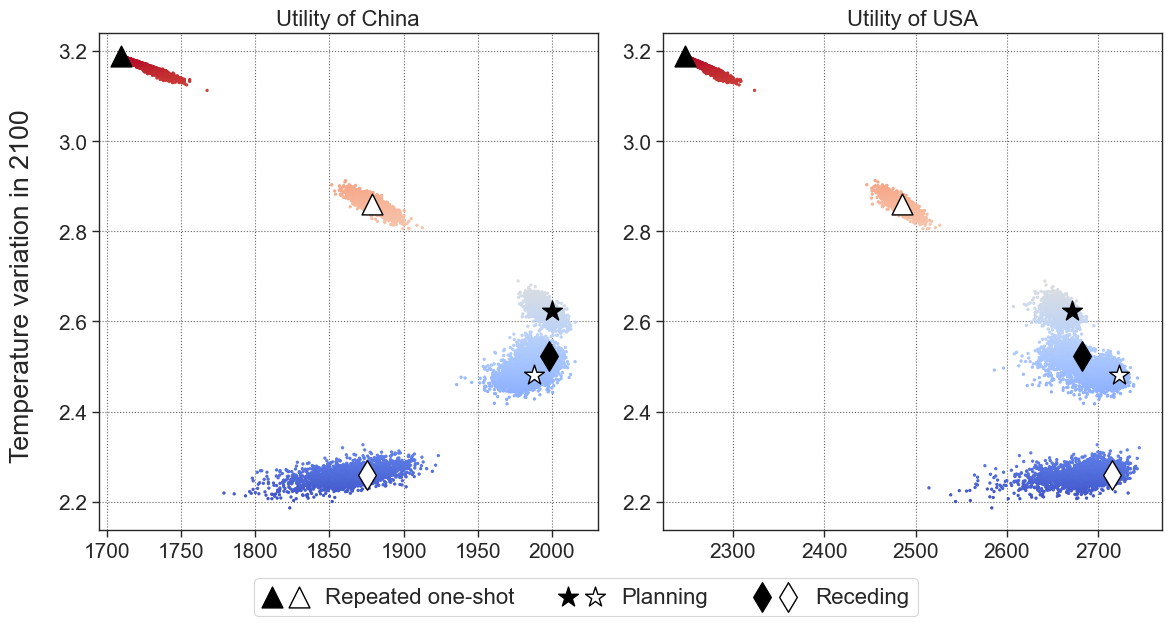

In [43]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple


fig, axs = plt.subplots(1,2, dpi=100, figsize=(12, 6))
axs = axs.flatten()

players = NAMES

for i, player in enumerate(players):
    axs[i].scatter(data_u[:, i], data_t[:, T-1], c=data_t[:, T-1], cmap='coolwarm', marker='.',s=10, rasterized=True)
                #    label='Strategy temperature for perturbated actions')
    # axs[i].plot(utilities[:, i], temp[:, T-1], color='black', ls='--')
    p1 = axs[i].scatter(u__[i], temp_[T-1], marker='^', label='Repeated one-shot', **ne_style)
    p2 = axs[i].scatter(u_so_[i], temp_so[T-1], marker='^', **so_style)
    repeated = (p1, p2)
    
    p1 = axs[i].scatter(u_p[i], temp_plan[T-1], marker='*', label='Planning', **ne_style)
    p2 = axs[i].scatter(u_p_so[i], temp_plan_so[T-1], marker='*', **so_style)
    planning = (p1, p2)

    p1 = axs[i].scatter(u_r[i], temp_rece[T-1], marker='d',  label='Receding', **ne_style)
    p2 = axs[i].scatter(u_r_so[i], temp_rece_so[T-1], marker='d', **so_style)
    receding = (p1, p2)

    axs[i].set_title(f'Utility of {player}')
    # if i % 3 == 0:
    #     axs[i].set_ylabel('Temperature variation in 2100')
    # axs[i].legend()


# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
handles, labels = axs[0].get_legend_handles_labels()

handles = [repeated, planning, receding]

by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 0.03), ncol=3, handler_map={tuple: HandlerTuple(ndivide=None)})
fig.supylabel('Temperature variation in 2100')
plt.savefig('journal/Efficiency_separated' + info + '.pdf', format='pdf', bbox_inches='tight')
plt.show()


# More player 

In [27]:
N = 3
"Default number of players"

# Espaces d'action des joueurs en GtCO2


ACTION_SETS =  np.array([[[0.0, 11.47],        # China  
                         [0.0, 5.01],
                         [0.0, 5.01]]]*2*T)*4       # other 

ACTION_SETS = np.swapaxes(ACTION_SETS,0,1)


r"""Default action set of the players.

References
----------

.. [1] Hannah Ritchie, Max Roser and Pablo Rosado (2020) - "CO₂ and Greenhouse Gas Emissions". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions' [Online Resource]
       https://ourworldindata.org/grapher/annual-co2-emissions-per-country?facet=none&country=CHN~USA~European+Union+%2828%29~IND~RUS~Asia+%28excl.+China+and+India%29

"""

# ACTION_SETS =  np.array([[[0.0, 10.0],        # China  
#                          [0.0, 0.1],         # USA
#                          [0.0, 0.1],         # EU
#                          [0.0, 0.1],         # India
#                          [0.0, 0.1],         # Russia
#                          [0.0, 0.1]]]*T)  
# Coefficient d'impact de la temperature sur le climat 

DELTAS = np.array([1.1847,
                    1.1941,
                    1.2941])
r"""Default damage multiplier. 

References
----------

.. [1] http://www.fund-model.org/MimiFUND.jl/latest/tables/#Table-RT:-Regional-temperature-conversion-factor-1
"""



# PIB max des joueurs, j'ai pris le PIB 2020                

GDP_MAX = np.array([14.63,
                    19.29,
                    15.29])*10


NAMES = ['China', 'USA', 'OW']


r = [ 0.2, 0.4, 0.3]
e = [10,-2, 2]

lower_bounds = np.copy(ACTION_SETS[:,:T,:][..., 0])
upper_bounds = np.copy(ACTION_SETS[:,:T,:][..., 1])

In [23]:
from utility.array_to_latex import array_to_latex

X = 2020 + np.arange((horizon-2020)//5 )*5

list_t_piece = np.arange(1,T,2)


list_damage_coef = [np.array([0,0,1]), np.array([0,-2,2]), np.array([0,0.25,0.16])] #, np.array([0,0,2]) ] #np.array([0,-2,2]),  np.array([0,-0.5,1.1])] #, np.array([0,0,1.1450]), np.array([0,0,0,0,1])]
list_alpha = [1,1.5,2] #[1,1.5,2]
list_list_benefit_functions = [
                                [partial(benefit_sigm, e=e[i], r = r[i]) for i in range(N)],
                                # BENEFITS_CONCAVE,
                                ]
 #[partial(benefit_sigm, e=e[i], r = r[i]) for i in range(N)], BENEFITS_LOG]
list_label_benefit_function = [
                                ('Sigmoid', '-'),
                                # ('Concave', '--'),
                                ]
#, #, ('Logaritmic', 'dotted')]
# list_damage_label = [array_to_latex(coef) for coef in list_damage_coef]


list_damage_label = [array_to_latex(coef) for coef in list_damage_coef]

case = 'sigmoid'
list_param = list(product(list_damage_coef, list_alpha, list_list_benefit_functions))
list_label = list(product(list_damage_label, list_alpha, list_label_benefit_function))

In [24]:
alpha = list_alpha[1]
benef = list_list_benefit_functions[0]
coef = list_damage_coef[1]

list_players = create_players(alpha=alpha, list_action_sets=ACTION_SETS, list_of_names=NAMES, list_benefit_functions=benef, damage_function=damage_polynome(coef), discount=1)

game = Game(list_players, horizon=horizon)

In [25]:
a_, sum_a_, u_, sum_u_, temp_ = game.receding_BRD_by_piece_return(1)
a_so, sum_a_so, u_so, sum_u_so, temp_so = game.planning_SO_by_piece_return(1)

a_rece, sum_a_rece, u_rece, sum_u_rece, temp_rece = game.receding_BRD_by_piece_return(T)
a_plan, sum_a_plan, u_plan, sum_u_plan, temp_plan = game.planning_BRD_by_piece_return(T)

a_plan_so, sum_a_plan_so, u_plan_so, sum_u_plan_so, temp_plan_so = game.planning_SO_by_piece_return(T)
a_rece_so, sum_a_rece_so, u_rece_so, sum_u_rece_so, temp_rece_so = game.receding_SO_by_piece_return(T)

list_a = [a_, a_so, a_plan, a_plan_so, a_rece, a_rece_so]


u__ = np.sum(u_, axis=1)
u_so_ = np.sum(u_so, axis =1)
u_p = np.sum(u_plan, axis=1)
u_r = np.sum(u_rece, axis=1)
u_p_so = np.sum(u_plan_so, axis =1)
u_r_so = np.sum(u_rece_so, axis =1)

Receding SO, t_piece = 16: 100%|██████████| 16/16 [00:07<00:00,  2.26it/s]


In [28]:
x = np.concatenate([np.concatenate([generate_perturbation(action, lower_bounds, upper_bounds, scale=scale) for action in list_a]) for scale in [0.05, 0.15, 0.5, 1, 1.5 ,2]])

ValueError: operands could not be broadcast together with shapes (1000,3,16) (2,16) 

In [ ]:
p = np.where(x < upper_bounds, x, upper_bounds)
p = np.where(p > lower_bounds, p, lower_bounds)
for l in x :
    if (upper_bounds < l).any() :
        print( upper_bounds - l ) 


In [ ]:
data_u, data_t = process(x, game)


Processing:   1%|▏         | 508/36000 [00:00<00:14, 2475.04it/s]

Processing: 100%|██████████| 36000/36000 [00:18<00:00, 1958.12it/s]


C:\Users\Anthony Couthures\AppData\Local\Temp\ipykernel_2420\1761741007.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(p)


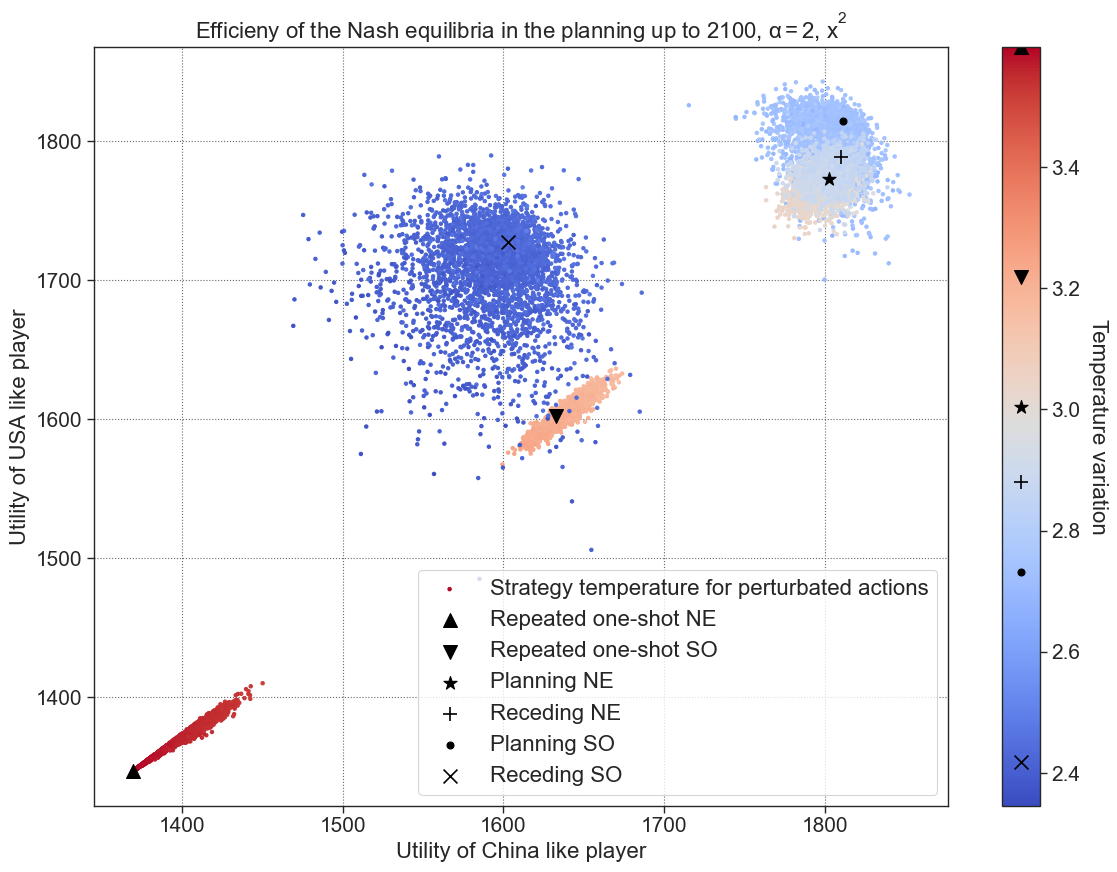

In [ ]:
fig = plt.figure(dpi = 100, figsize=(12,9))
ax = fig.gca()
p = ax.scatter(data_u[:,0], data_u[:,-1], c=data_t[:,T-1], cmap='coolwarm', marker='.', label='Strategy temperature for perturbated actions')
# ax[0] =  sns.kdeplot(x=data_u[:,0], y=data_u[:,1], hue=data_t[:,T-1], warn_singular=False)

cbar = fig.colorbar(p)

ax.scatter(u__[0], u__[-1], marker='^', c='black', s=100, label='Repeated one-shot NE')
ax.scatter(u_so_[0], u_so_[-1], marker='v', c='black', s=100, label='Repeated one-shot SO')

ax.scatter(u_p[0], u_p[-1], marker='*', c='black', s=100, label='Planning NE')
ax.scatter(u_r[0], u_r[-1], marker='+', c='black',s=100, label='Receding NE')
ax.scatter(u_p_so[0], u_p_so[-1], marker='.',c='black', s=100, label='Planning SO')
ax.scatter(u_r_so[0], u_r_so[-1], marker='x',c='black', s=100, label='Receding SO')
x_s = cbar.ax.set_xlim()
x_s = sum(x_s)/2
ax.legend()
cbar.ax.scatter(x_s,temp_[T-1], marker='^',c='black', s=100, label='Repeated one-shot NE')
cbar.ax.scatter(x_s,temp_so[T-1], marker='v',c='black', s=100, label='Repeated one-shot SO')

cbar.set_label('Temperature variation', rotation=270, labelpad=20)
cbar.ax.scatter(x_s,temp_plan[T-1], marker='*', c='black', s=100, label='Nash Equilibria')
cbar.ax.scatter(x_s,temp_rece[T-1], marker='+', c='black',s=100, label='Receding Nash Equilibria')
cbar.ax.scatter(x_s,temp_plan_so[T-1], marker='.',c='black', s=100, label='SO')
cbar.ax.scatter(x_s,temp_rece_so[T-1], marker='x',c='black', s=100, label='Receding SO')

plt.xlabel('Utility of China like player')
plt.ylabel('Utility of USA like player')
plt.title('Efficieny of the Nash equilibria in the planning up to {}, $\\alpha = 2$, $x^2$'.format(horizon))
plt.savefig('journal/Efficiency' + '.pdf', format='pdf')
plt.show()

In [5]:
N = 6
"Default number of players"

# Espaces d'action des joueurs en GtCO2


ACTION_SETS =  np.array([[[0.0, 11.47],        # China  
                         [0.0, 5.01],         # USA
                         [0.0, 3.14],         # EU
                         [0.0, 2.71],         # India
                         [0.0, 1.76],         # Russia
                         [0.0, 13.51]]]*2*T)*2       # other 

ACTION_SETS = np.swapaxes(ACTION_SETS,0,1)



r"""Default action set of the players.

References
----------

.. [1] Hannah Ritchie, Max Roser and Pablo Rosado (2020) - "CO₂ and Greenhouse Gas Emissions". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions' [Online Resource]
       https://ourworldindata.org/grapher/annual-co2-emissions-per-country?facet=none&country=CHN~USA~European+Union+%2828%29~IND~RUS~Asia+%28excl.+China+and+India%29

"""

# ACTION_SETS =  np.array([[[0.0, 10.0],        # China  
#                          [0.0, 0.1],         # USA
#                          [0.0, 0.1],         # EU
#                          [0.0, 0.1],         # India
#                          [0.0, 0.1],         # Russia
#                          [0.0, 0.1]]]*T)  
# Coefficient d'impact de la temperature sur le climat 

DELTAS = np.array([1.1847,
                    1.1941,
                    1.1248,
                    0.9074,
                    1.2866,
                    1.1847])
r"""Default damage multiplier. 

References
----------

.. [1] http://www.fund-model.org/MimiFUND.jl/latest/tables/#Table-RT:-Regional-temperature-conversion-factor-1
"""



# PIB max des joueurs, j'ai pris le PIB 2020                

GDP_MAX = np.array([14.63,
                    19.29,
                    13.89,
                    2.5,
                    1.42,
                    26.27 - 14.63])*10
r"""Default maximum GDP 
References
----------

.. [1] https://ourworldindata.org/grapher/gross-domestic-product?tab=chart&time=latest&facet=none&country=CHN~USA~European+Union+%2828%29~IND~RUS~Asia+%28excl.+China+and+India%29~OWID_WRL~Africa~South+America+%28GCP%29~CAN~European+Union~East+Asia+and+Pacific
"""

NAMES = ['China', 'USA', 'EU', 'India', 'Russia', 'ROTW']

r = [1.15, 1.60, 2, 0.5, 1.25,0.75]
e = [2, -2, -5, -4, -5, 2.5]

lower_bounds = np.copy(ACTION_SETS[:,:T,:][..., 0])
upper_bounds = np.copy(ACTION_SETS[:,:T,:][..., 1])

In [6]:
from utility.array_to_latex import array_to_latex

X = 2020 + np.arange((horizon-2020)//5 )*5

list_t_piece = np.arange(1,T,2)


list_damage_coef = [np.array([0,0,1]), np.array([0,-2,2]), np.array([0,0.25,0.16])] #, np.array([0,0,2]) ] #np.array([0,-2,2]),  np.array([0,-0.5,1.1])] #, np.array([0,0,1.1450]), np.array([0,0,0,0,1])]
list_alpha = [1,1.5,2] #[1,1.5,2]
list_list_benefit_functions = [
                                [partial(benefit_sigm, e=e[i], r = r[i]) for i in range(N)],
                                # BENEFITS_CONCAVE,
                                ]
 #[partial(benefit_sigm, e=e[i], r = r[i]) for i in range(N)], BENEFITS_LOG]
list_label_benefit_function = [
                                ('Sigmoid', '-'),
                                # ('Concave', '--'),
                                ]
#, #, ('Logaritmic', 'dotted')]
# list_damage_label = [array_to_latex(coef) for coef in list_damage_coef]


list_damage_label = [array_to_latex(coef) for coef in list_damage_coef]

case = 'sigmoid'
list_param = list(product(list_damage_coef, list_alpha, list_list_benefit_functions))
list_label = list(product(list_damage_label, list_alpha, list_label_benefit_function))

In [7]:
alpha = list_alpha[1]
benef = list_list_benefit_functions[0]
coef = list_damage_coef[1]

list_players = create_players(alpha=alpha, list_action_sets=ACTION_SETS, list_of_names=NAMES, list_benefit_functions=benef, damage_function=damage_polynome(coef), discount=1)

game = Game(list_players, horizon=horizon)

In [8]:
a_, sum_a_, u_, sum_u_, temp_ = game.receding_BRD_by_piece_return(1)
a_so, sum_a_so, u_so, sum_u_so, temp_so = game.planning_SO_by_piece_return(1)

a_rece, sum_a_rece, u_rece, sum_u_rece, temp_rece = game.receding_BRD_by_piece_return(T)
a_plan, sum_a_plan, u_plan, sum_u_plan, temp_plan = game.planning_BRD_by_piece_return(T)

a_plan_so, sum_a_plan_so, u_plan_so, sum_u_plan_so, temp_plan_so = game.planning_SO_by_piece_return(T)
a_rece_so, sum_a_rece_so, u_rece_so, sum_u_rece_so, temp_rece_so = game.receding_SO_by_piece_return(T)

list_a = [a_, a_so, a_plan, a_plan_so, a_rece, a_rece_so]

u__ = np.sum(u_, axis=1)
u_so_ = np.sum(u_so, axis =1)
u_p = np.sum(u_plan, axis=1)
u_r = np.sum(u_rece, axis=1)
u_p_so = np.sum(u_plan_so, axis =1)
u_r_so = np.sum(u_rece_so, axis =1)

list_u =  [u__, u_so_, u_p, u_r, u_p_so, u_r_so]

Planning SO, t_piece = 1:   0%|          | 0/16 [00:00<?, ?it/s]

Receding SO, t_piece = 16: 100%|██████████| 16/16 [01:00<00:00,  3.80s/it]


In [9]:
def generate_perturbation(action, lower_bounds, upper_bounds, size=1000, scale=.05):
    shape = action.shape
    perturbation = stats.norm.rvs(loc = 0, scale=scale, size=(size,*shape))
    arr = action + perturbation
    res = np.where(arr < upper_bounds, arr, upper_bounds)
    res = np.where(res > lower_bounds, res, lower_bounds)
    return res

In [10]:
x = np.concatenate([np.concatenate([generate_perturbation(action, lower_bounds, upper_bounds, scale=scale) for scale in [0.05, 0.15, 0.5, 1, 1.5 ,2]]) for action in list_a]) 

In [11]:
p = np.where(x < upper_bounds, x, upper_bounds)
p = np.where(p > lower_bounds, p, lower_bounds)
for l in x :
    if (upper_bounds < l).any() :
        print( upper_bounds - l ) 


In [12]:
data_u, data_t = process(x, game)


Processing: 100%|██████████| 36000/36000 [00:48<00:00, 737.43it/s]


In [13]:
ne_style = {
    'color' : 'black',
    'linewidths' : 1,
            }
so_style = {
    'c' : 'white',
    'edgecolors' : 'black',
    'linewidths' : 1,
    'alpha' : 1
            }
plt.rcParams['lines.markersize'] = 10


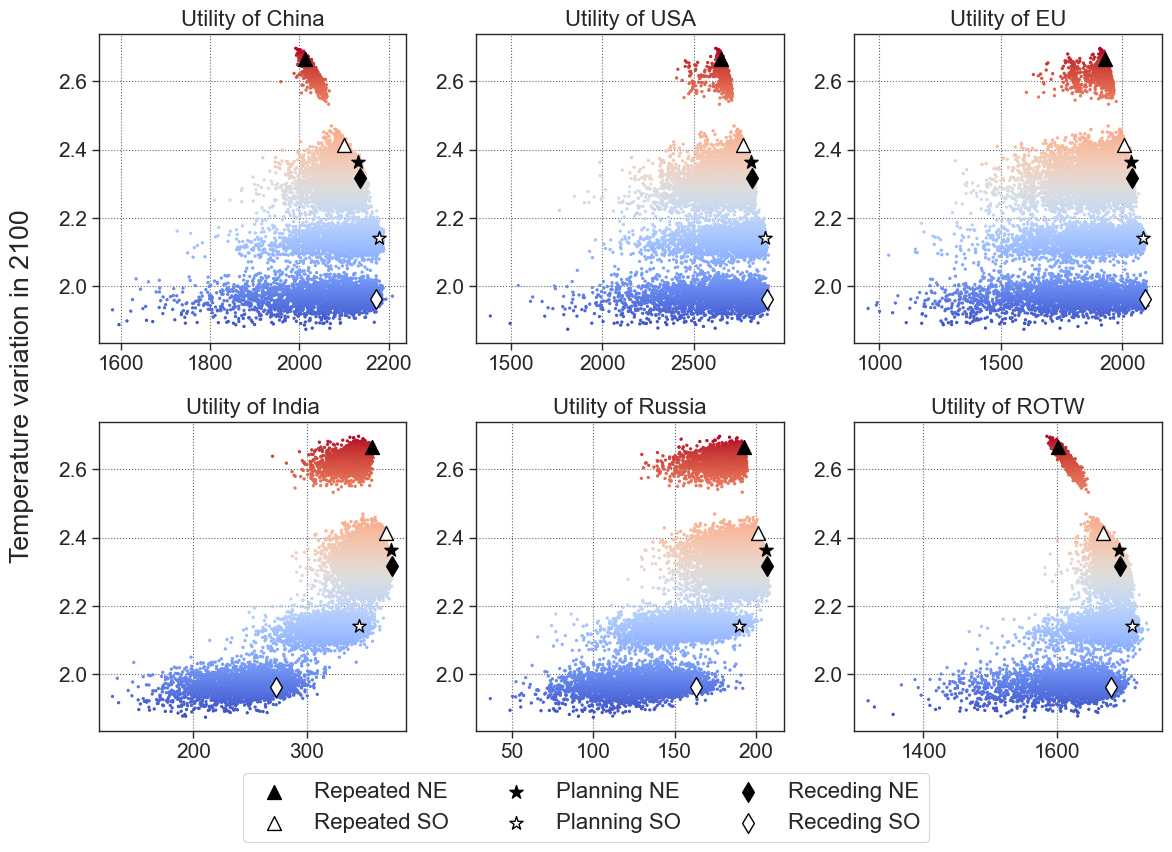

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, dpi=100, figsize=(12, 8))
axs = axs.flatten()

players = NAMES

for i, player in enumerate(players):
    axs[i].scatter(data_u[:, i], data_t[:, T-1], c=data_t[:, T-1], cmap='coolwarm', marker='.',s=10, rasterized=True)
                #    label='Strategy temperature for perturbated actions')
    # axs[i].plot(utilities[:, i], temp[:, T-1], color='black', ls='--')
    axs[i].scatter(u__[i], temp_[T-1], marker='^', label='Repeated NE', **ne_style)
    axs[i].scatter(u_so_[i], temp_so[T-1], marker='^',  label='Repeated SO', **so_style)
    axs[i].scatter(u_p[i], temp_plan[T-1], marker='*', label='Planning NE', **ne_style)
    axs[i].scatter(u_p_so[i], temp_plan_so[T-1], marker='*',  label='Planning SO', **so_style)
    axs[i].scatter(u_r[i], temp_rece[T-1], marker='d',  label='Receding NE', **ne_style)
    axs[i].scatter(u_r_so[i], temp_rece_so[T-1], marker='d',  label='Receding SO', **so_style)
    axs[i].set_title(f'Utility of {player}')
    # if i % 3 == 0:
    #     axs[i].set_ylabel('Temperature variation in 2100')
    # axs[i].legend()


# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.supylabel('Temperature variation in 2100')
fig.legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 0.03), ncol=3)
plt.savefig('journal/Efficiency_6player.pdf', format='pdf')
plt.show()


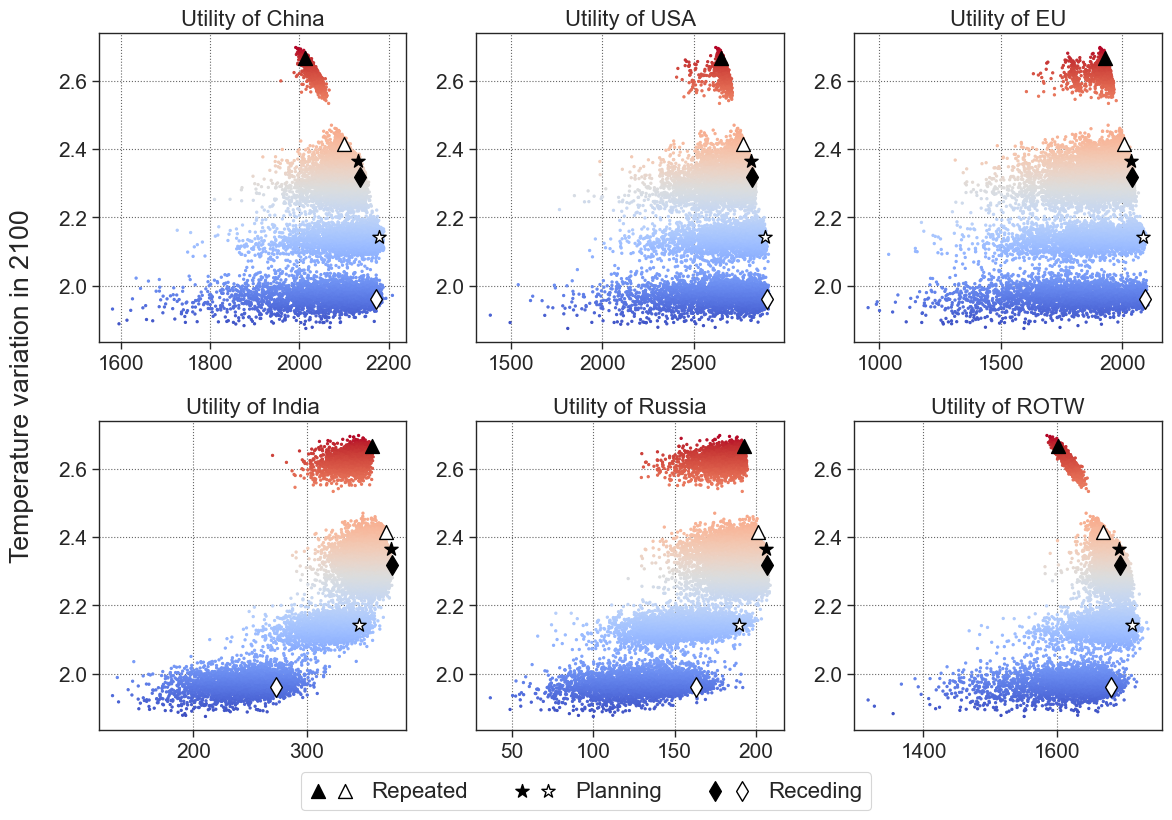

In [16]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple


fig, axs = plt.subplots(2, 3, dpi=100, figsize=(12, 8))
axs = axs.flatten()

players = NAMES

for i, player in enumerate(players):
    axs[i].scatter(data_u[:, i], data_t[:, T-1], c=data_t[:, T-1], cmap='coolwarm', marker='.',s=10, rasterized=True)
                #    label='Strategy temperature for perturbated actions')
    # axs[i].plot(utilities[:, i], temp[:, T-1], color='black', ls='--')
    p1 = axs[i].scatter(u__[i], temp_[T-1], marker='^', label='Repeated', **ne_style)
    p2 = axs[i].scatter(u_so_[i], temp_so[T-1], marker='^', **so_style)
    repeated = (p1, p2)
    
    p1 = axs[i].scatter(u_p[i], temp_plan[T-1], marker='*', label='Planning', **ne_style)
    p2 = axs[i].scatter(u_p_so[i], temp_plan_so[T-1], marker='*', **so_style)
    planning = (p1, p2)

    p1 = axs[i].scatter(u_r[i], temp_rece[T-1], marker='d',  label='Receding', **ne_style)
    p2 = axs[i].scatter(u_r_so[i], temp_rece_so[T-1], marker='d', **so_style)
    receding = (p1, p2)

    axs[i].set_title(f'Utility of {player}')
    # if i % 3 == 0:
    #     axs[i].set_ylabel('Temperature variation in 2100')
    # axs[i].legend()


# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
handles, labels = axs[0].get_legend_handles_labels()

handles = [repeated, planning, receding]

by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 0.03), ncol=3, handler_map={tuple: HandlerTuple(ndivide=None)})
fig.supylabel('Temperature variation in 2100')
plt.savefig('journal/Efficiency_6player.pdf', format='pdf' , bbox_inches='tight') 
plt.show()


NameError: name 'ne_style' is not defined

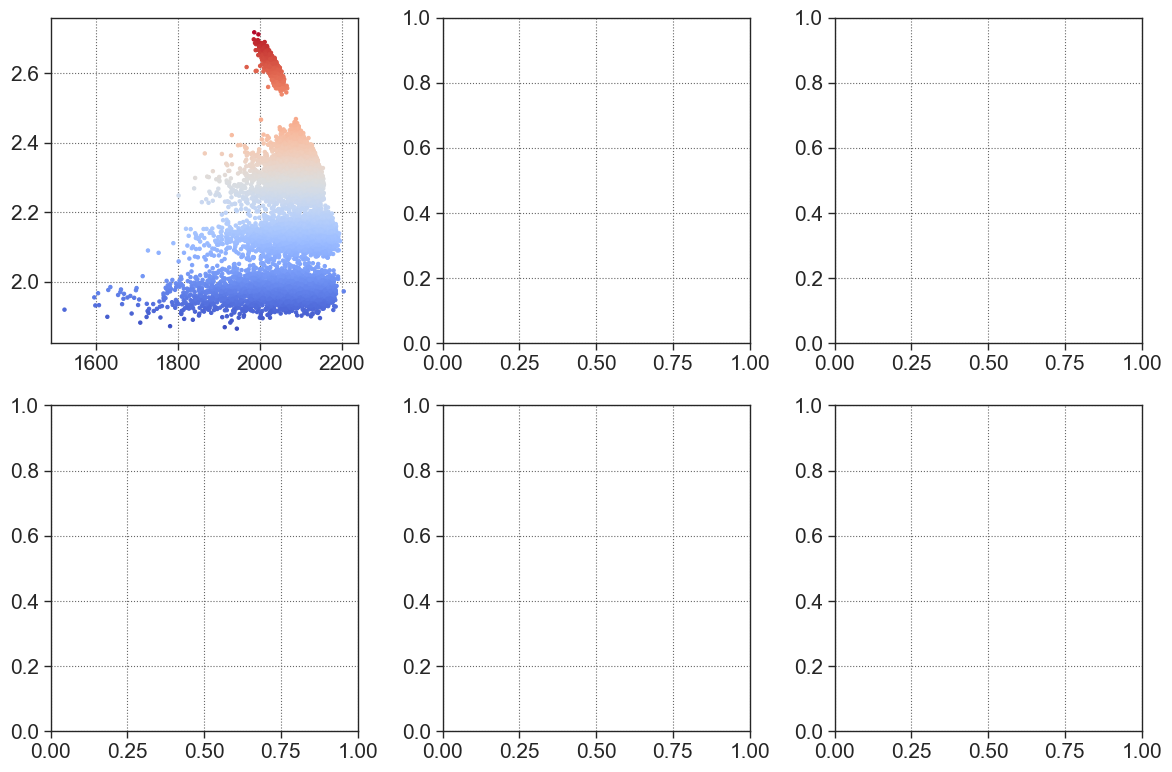

In [103]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, dpi=100, figsize=(12, 8))
axs = axs.flatten()

players = NAMES

for i, player in enumerate(players):
    axs[i].scatter(data_u[:, i], data_t[:, T-1], c=data_t[:, T-1], cmap='coolwarm', marker='.', rasterized=True)
                #    label='Strategy temperature for perturbated actions')
    # axs[i].plot(utilities[:, i], temp[:, T-1], color='black', ls='--')
    axs[i].scatter(u__[i], temp_[T-1], marker='^', c='black', s=100, label='Repeated NE')
    axs[i].scatter(u_so_[i], temp_so[T-1], marker='v', c='black', s=100, label='Repeated SO')
    axs[i].scatter(u_p[i], temp_plan[T-1], marker='*', c='black', s=100, label='Planning NE')
    axs[i].scatter(u_p_so[i], temp_plan_so[T-1], marker='.', c='black', s=100, label='Planning SO')
    axs[i].scatter(u_r[i], temp_rece[T-1], marker='+', c='black', s=100, label='Receding NE')
    axs[i].scatter(u_r_so[i], temp_rece_so[T-1], marker='x', c='black', s=100, label='Receding SO')
    axs[i].set_title(f'Utility of {player}')
    # if i % 3 == 0:
    #     axs[i].set_ylabel('Temperature variation in 2100')
    # axs[i].legend()


# plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)

handles, labels = axs[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.supylabel('Temperature variation in 2100')
fig.legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 0.03), ncol=3)
plt.savefig('journal/Efficiencyv6.pdf', format='pdf')
plt.show()
